In [3]:
#1.1
import numpy as np
import pandas as pd

# 尝试读取CSV文件
try:
    co2_global = pd.read_csv('co2_annmean_gl.csv')
    co2_mlo = pd.read_csv('co2_annmean_mlo.csv')
except Exception as e:
    print(f"读取文件时出现错误：{e}")
    exit()

# 提取1987年到2004年的数据
co2_global = co2_global[(co2_global['year'] >= 1987) & (co2_global['year'] <= 2004)]
co2_mlo = co2_mlo[(co2_mlo['year'] >= 1987) & (co2_mlo['year'] <= 2004)]

# 参数定义
k12 = 60 / 615  # 大气到海洋的转移速率常数
k21 = 60 / 842  # 海洋到大气的转移速率常数
gamma = 0  # 每年人为排放的CO2量（ppm/年），这里假设数据中已经包含了人为排放的影响
N1_0 = 347  # 1987年初大气中的CO2浓度（ppm）
N2_0 = 821  # 1987年初海洋中的CO2浓度（ppm）

# 初始化数组
N1 = np.zeros(len(co2_global))
N2 = np.zeros(len(co2_global))
N1[0] = N1_0
N2[0] = N2_0

# 时间步长
dt = 1  # 年

# 欧拉方法求解微分方程
for i in range(1, len(co2_global)):
    dN1_dt = -k12 * N1[i-1] + k21 * N2[i-1] + gamma
    dN2_dt = k12 * N1[i-1] - k21 * N2[i-1]
    N1[i] = N1[i-1] + dN1_dt * dt
    N2[i] = N2[i-1] + dN2_dt * dt

# 输出结果
print("Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004:")
for year, co2_level in zip(co2_global['year'], N1):
    print(f"{year}: {co2_level:.2f}")

Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004:
1987: 347.00
1988: 371.65
1989: 392.14
1990: 409.17
1991: 423.32
1992: 435.09
1993: 444.87
1994: 452.99
1995: 459.75
1996: 465.37
1997: 470.03
1998: 473.91
1999: 477.14
2000: 479.82
2001: 482.05
2002: 483.90
2003: 485.44
2004: 486.71


In [5]:
#1.2
import numpy as np
import pandas as pd

# 尝试读取CSV文件
try:
    co2_global = pd.read_csv('co2_annmean_gl.csv')
    co2_mlo = pd.read_csv('co2_annmean_mlo.csv')
except Exception as e:
    print(f"读取文件时出现错误：{e}")
    exit()

# 提取1987年到2004年的数据
co2_global = co2_global[(co2_global['year'] >= 1987) & (co2_global['year'] <= 2004)]
co2_mlo = co2_mlo[(co2_mlo['year'] >= 1987) & (co2_mlo['year'] <= 2004)]

# 参数定义
k12 = 60 / 615  # 大气到海洋的转移速率常数
k21 = 60 / 842  # 海洋到大气的转移速率常数
gamma = 0  # 每年人为排放的CO2量（ppm/年），这里假设数据中已经包含了人为排放的影响
N1_0 = 347  # 1987年初大气中的CO2浓度（ppm）
N2_0 = 821  # 1987年初海洋中的CO2浓度（ppm）
buffer_coefficient = 0.02  # 缓冲效应系数

# 初始化数组
N1 = np.zeros(len(co2_global))
N2 = np.zeros(len(co2_global))
N1[0] = N1_0
N2[0] = N2_0

# 时间步长
dt = 1  # 年

# 欧拉方法求解微分方程，考虑缓冲效应
for i in range(1, len(co2_global)):
    # 计算微分方程的导数，考虑缓冲效应
    dN1_dt = -k12 * N1[i-1] + k21 * (N2_0 + buffer_coefficient * (N2[i-1] - N2_0)) + gamma
    dN2_dt = k12 * N1[i-1] - k21 * (N2_0 + buffer_coefficient * (N2[i-1] - N2_0))
    # 更新CO2浓度
    N1[i] = N1[i-1] + dN1_dt * dt
    N2[i] = N2[i-1] + dN2_dt * dt

# 输出结果
print("Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004 with Buffer Effect:")
for year, co2_level in zip(co2_global['year'], N1):
    print(f"{year}: {co2_level:.2f}")

Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004 with Buffer Effect:
1987: 347.00
1988: 371.65
1989: 393.86
1990: 413.87
1991: 431.90
1992: 448.15
1993: 462.79
1994: 475.97
1995: 487.86
1996: 498.56
1997: 508.21
1998: 516.90
1999: 524.74
2000: 531.79
2001: 538.15
2002: 543.88
2003: 549.04
2004: 553.69


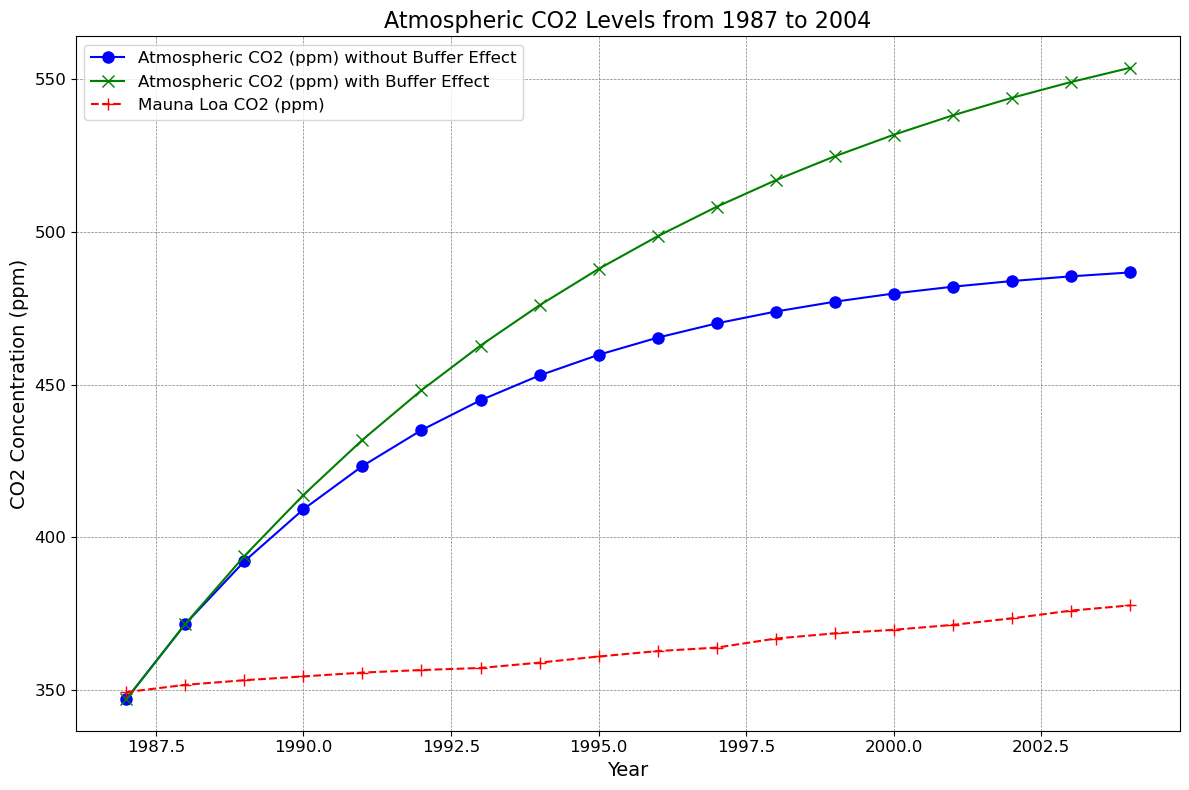

In [11]:
#1.4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 尝试读取CSV文件
try:
    co2_global = pd.read_csv('co2_annmean_gl.csv')
    co2_mlo = pd.read_csv('co2_annmean_mlo.csv')
except Exception as e:
    print(f"读取文件时出现错误：{e}")
    exit()

# 提取1987年到2004年的数据
co2_global = co2_global[(co2_global['year'] >= 1987) & (co2_global['year'] <= 2004)]
co2_mlo = co2_mlo[(co2_mlo['year'] >= 1987) & (co2_mlo['year'] <= 2004)]

# 参数定义
k12 = 60 / 615  # 大气到海洋的转移速率常数
k21 = 60 / 842  # 海洋到大气的转移速率常数
gamma = 0  # 每年人为排放的CO2量（ppm/年），这里假设数据中已经包含了人为排放的影响
N1_0 = 347  # 1987年初大气中的CO2浓度（ppm）
N2_0 = 821  # 1987年初海洋中的CO2浓度（ppm）
buffer_coefficient = 0.02  # 缓冲效应系数

# 初始化数组
N1_no_buffer = np.zeros(len(co2_global))
N2_no_buffer = np.zeros(len(co2_global))
N1_buffer = np.zeros(len(co2_global))
N2_buffer = np.zeros(len(co2_global))

N1_no_buffer[0] = N1_0
N2_no_buffer[0] = N2_0
N1_buffer[0] = N1_0
N2_buffer[0] = N2_0

# 时间步长
dt = 1  # 年

# 欧拉方法求解微分方程
def euler_method(N1, N2, k12, k21, gamma, dt, buffer_coefficient=0):
    for i in range(1, len(N1)):
        dN1_dt = -k12 * N1[i-1] + k21 * (N2[i-1] if buffer_coefficient == 0 else N2_0 + buffer_coefficient * (N2[i-1] - N2_0)) + gamma
        dN2_dt = k12 * N1[i-1] - k21 * (N2[i-1] if buffer_coefficient == 0 else N2_0 + buffer_coefficient * (N2[i-1] - N2_0))
        N1[i] = N1[i-1] + dN1_dt * dt
        N2[i] = N2[i-1] + dN2_dt * dt

euler_method(N1_no_buffer, N2_no_buffer, k12, k21, gamma, dt)
euler_method(N1_buffer, N2_buffer, k12, k21, gamma, dt, buffer_coefficient)

# 绘制结果
plt.figure(figsize=(12, 8))  # 设置图形大小
plt.plot(co2_global['year'], N1_no_buffer, label='Atmospheric CO2 (ppm) without Buffer Effect', marker='o', color='blue', markersize=8, linestyle='-')
plt.plot(co2_global['year'], N1_buffer, label='Atmospheric CO2 (ppm) with Buffer Effect', marker='x', color='green', markersize=8, linestyle='-')
plt.plot(co2_mlo['year'], co2_mlo['mean'], label='Mauna Loa CO2 (ppm)', linestyle='--', marker='+', color='red', markersize=8)

plt.xlabel('Year', fontsize=14)  # 设置x轴标签
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)  # 设置y轴标签
plt.title('Atmospheric CO2 Levels from 1987 to 2004', fontsize=16)  # 设置标题
plt.legend(fontsize=12)  # 设置图例
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # 设置网格线
plt.xticks(fontsize=12)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()

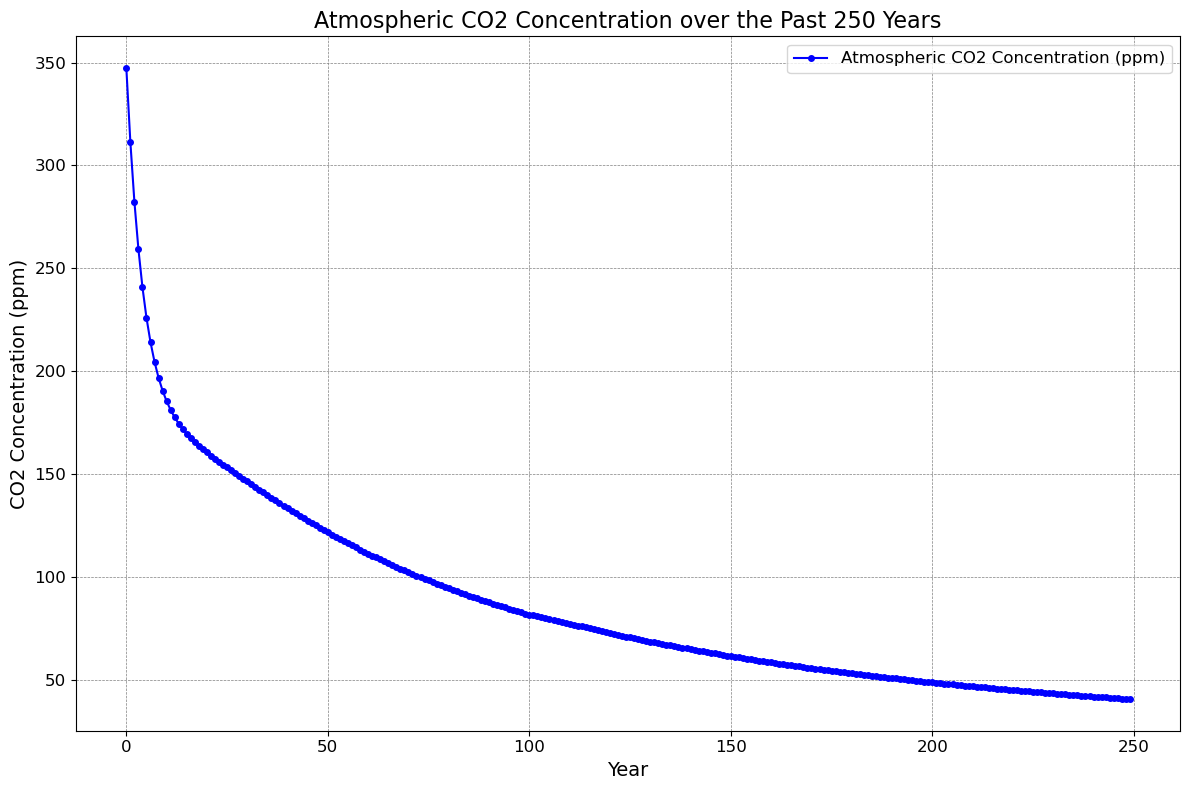

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义模型参数
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1328
f0 = 62  # 前工业时代的净初级生产力
beta = 0.42  # 施肥因子

# 初始条件
N1_0 = 740  # 大气中的碳含量（PgC）
N2_0 = 900  # 表层海洋中的碳含量（PgC）
N3_0 = 9744  # 中层海洋中的碳含量（PgC）
N4_0 = 26280  # 深层海洋中的碳含量（PgC）
N5_0 = 90000000  # 沉积物中的碳含量（PgC）
N6_0 = 731  # 陆地生物圈中的碳含量（PgC）
N7_0 = 1328  # 土壤中的碳含量（PgC）

# 人类活动排放的CO2
gamma = 0  # 从1750年到1850年，人类活动排放的CO2为0
delta = 0  # 从1750年到1850年，土地利用变化排放的CO2为0

# 时间步长
dt = 1  # 年

# 初始化数组
N = np.zeros((7, 250))

# 设置初始条件
N[:, 0] = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0]

# 模拟过去250年的大气CO2浓度
for i in range(1, 250):
    # 计算CO2浓度
    P = N[0, i-1] / 2.13
    # 计算施肥因子
    f = f0 * (1 + beta * np.log(P / 289))
    # 计算CO2排放
    if i > 100:  # 从1850年开始，人类活动和土地利用变化排放CO2
        gamma = 0.5  # 人类活动排放的CO2（PgC/年）
        delta = 0.2  # 土地利用变化排放的CO2（PgC/年）
    # 计算每个碳库的变化
    dN_dt = np.array([
        -k12 * N[0, i-1] + k21 * (N[1, i-1] - N2_0) + gamma - f + k51 * N[4, i-1] + k71 * N[6, i-1],
        k12 * N[0, i-1] - k21 * (N[1, i-1] - N2_0) - k23 * N[1, i-1] + k32 * N[2, i-1] - k24 * N[1, i-1],
        k23 * N[1, i-1] - k32 * N[2, i-1] - k34 * N[2, i-1] + k43 * N[3, i-1],
        k34 * N[2, i-1] - k43 * N[3, i-1] + k24 * N[1, i-1] - k45 * N[3, i-1],
        k45 * N[3, i-1] - k51 * N[4, i-1],
        f - k67 * N[5, i-1] - 2 * delta,
        k67 * N[5, i-1] - k71 * N[6, i-1] + delta
    ])
    # 更新每个碳库的碳含量
    N[:, i] = N[:, i-1] + dN_dt * dt

# 计算大气CO2浓度
CO2_concentration = N[0] / 2.13

# 绘制结果
plt.figure(figsize=(12, 8))  # 设置图形大小
plt.plot(CO2_concentration, label='Atmospheric CO2 Concentration (ppm)', color='blue', linestyle='-', marker='o', markersize=4)
plt.xlabel('Year', fontsize=14)  # 设置x轴标签
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)  # 设置y轴标签
plt.title('Atmospheric CO2 Concentration over the Past 250 Years', fontsize=16)  # 设置标题
plt.legend(fontsize=12)  # 设置图例
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # 设置网格线
plt.xticks(fontsize=12)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()